<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/xgBOOST_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Cl1 = '/content/Classeurcc.xlsx'
data1= pd.read_excel(Cl1,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
del data1["Source"]
del data1["CodeSite"]
data1.head()

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,1,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,1,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,1,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,0,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [ ]:
X1 = data1.loc[:, data1.columns != 'Cs_longia']
y1 = data1.Cs_longia

In [ ]:
y1

0      1
1      1
2      1
3      0
4      0
      ..
255    1
256    1
257    1
258    1
259    1
Name: Cs_longia, Length: 260, dtype: int64

In [ ]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot
import xgboost as xgb

XGBClassifier


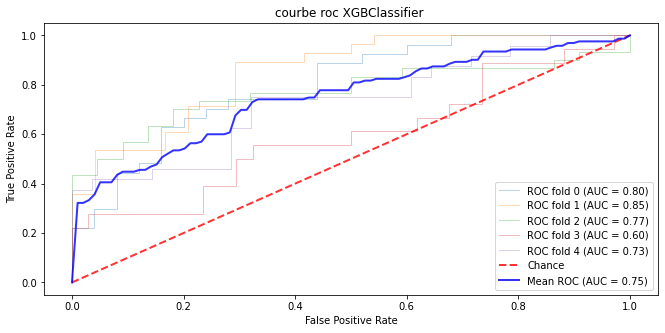

Accuracy: [0.73076923 0.73076923 0.73076923 0.55769231 0.69230769]
moy_accuracy: 0.69
precision: [0.7826087  0.75       0.80769231 0.4        0.65384615]
moy_precision: 0.68
sensibilité : [0.66666667 0.75       0.7        0.55555556 0.70833333]
moy_sensibilité: 0.68
spécificité : [0.8        0.70833333 0.77272727 0.55882353 0.67857143]
moy_spécificité: 0.70
MCC : [0.46945693 0.45833333 0.46709937 0.10891067 0.38575837]
MCC: 0.38


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=3,n_estimators=100)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         viz = plot_roc_curve(clf, X1.loc[test,], y1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)
      

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

XGBClassifier


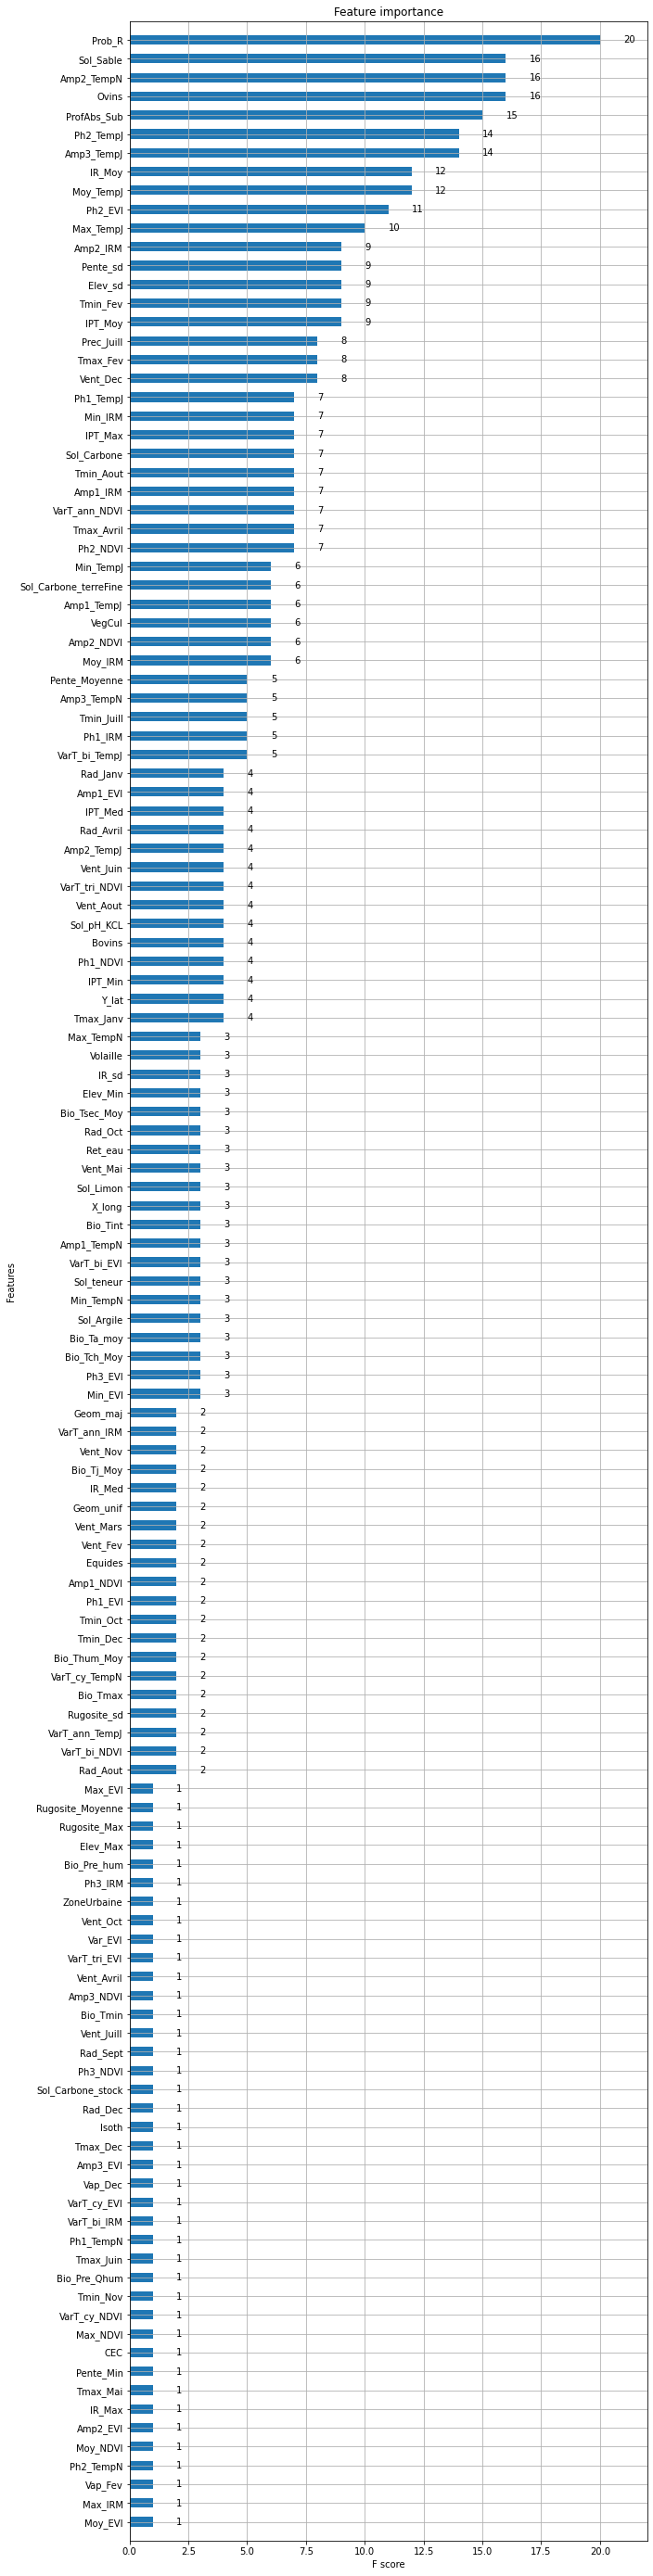

{'Amp3_TempJ': 14, 'Moy_TempJ': 12, 'Vent_Dec': 8, 'Tmax_Fev': 8, 'Ph2_NDVI': 7, 'Ovins': 16, 'Tmax_Janv': 4, 'Moy_IRM': 6, 'VarT_bi_TempJ': 5, 'Ph1_IRM': 5, 'Moy_EVI': 1, 'IPT_Moy': 9, 'Y_lat': 4, 'Max_TempJ': 10, 'Min_EVI': 3, 'Rad_Aout': 2, 'Ph2_TempJ': 14, 'Tmin_Fev': 9, 'Tmax_Avril': 7, 'IPT_Min': 4, 'Prob_R': 20, 'Max_IRM': 1, 'Vap_Fev': 1, 'VarT_bi_NDVI': 2, 'VarT_ann_NDVI': 7, 'Tmin_Juill': 5, 'Ph1_NDVI': 4, 'VarT_ann_TempJ': 2, 'Rugosite_sd': 2, 'Prec_Juill': 8, 'Bio_Tmax': 2, 'ProfAbs_Sub': 15, 'Bovins': 4, 'Ph2_EVI': 11, 'Ph2_TempN': 1, 'Amp1_IRM': 7, 'Ph3_EVI': 3, 'Moy_NDVI': 1, 'Bio_Tch_Moy': 3, 'Amp2_TempN': 16, 'Amp3_TempN': 5, 'VarT_cy_TempN': 2, 'Sol_pH_KCL': 4, 'Amp2_NDVI': 6, 'Bio_Ta_moy': 3, 'VegCul': 6, 'Vent_Aout': 4, 'VarT_tri_NDVI': 4, 'Sol_Sable': 16, 'Amp2_EVI': 1, 'Vent_Juin': 4, 'Amp2_TempJ': 4, 'Rad_Avril': 4, 'Bio_Thum_Moy': 2, 'IR_Moy': 12, 'Sol_Argile': 3, 'Min_TempN': 3, 'IR_Max': 1, 'Amp1_TempJ': 6, 'Tmin_Aout': 7, 'Tmax_Mai': 1, 'Sol_Carbone': 7, 'Sol

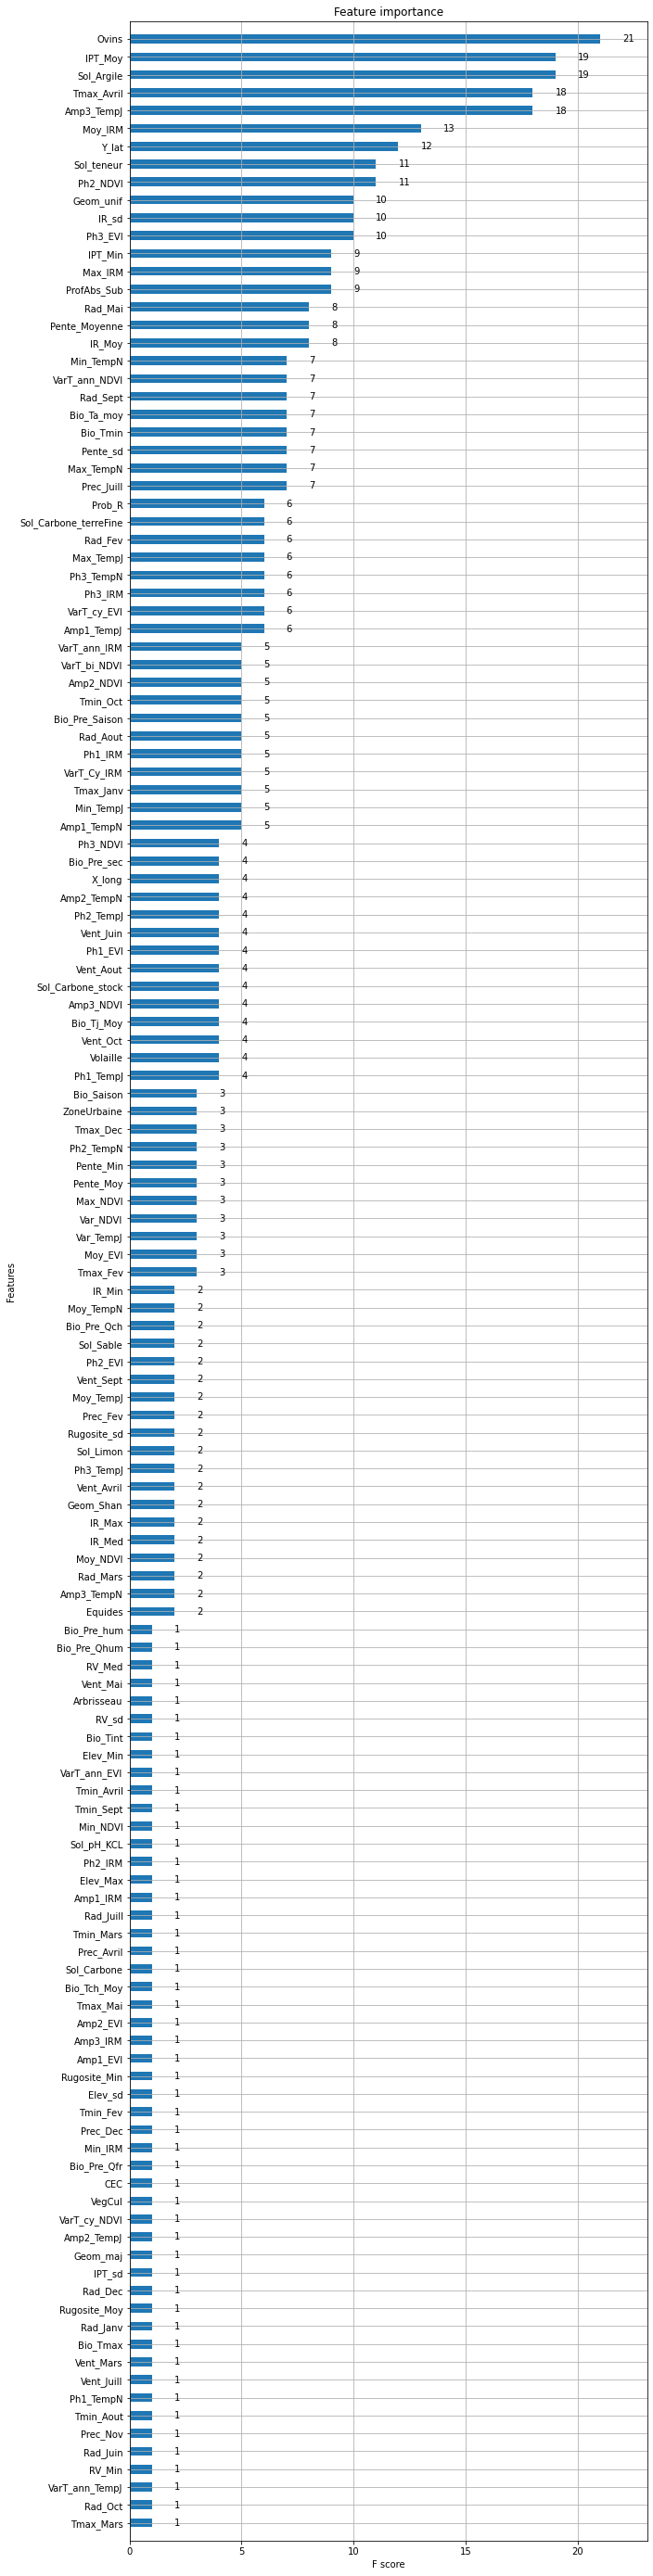

{'Amp3_TempJ': 18, 'Ovins': 21, 'Ph1_TempJ': 4, 'Volaille': 4, 'Moy_IRM': 13, 'Tmax_Fev': 3, 'Sol_Argile': 19, 'Moy_EVI': 3, 'IPT_Moy': 19, 'Ph3_EVI': 10, 'Amp1_TempJ': 6, 'Vent_Oct': 4, 'Amp1_TempN': 5, 'Tmax_Avril': 18, 'Tmax_Mars': 1, 'Min_TempJ': 5, 'Rad_Oct': 1, 'VarT_ann_TempJ': 1, 'Var_TempJ': 3, 'RV_Min': 1, 'Tmax_Janv': 5, 'Prec_Juill': 7, 'Bio_Tj_Moy': 4, 'Equides': 2, 'Max_TempN': 7, 'Rad_Juin': 1, 'Ph2_NDVI': 11, 'Var_NDVI': 3, 'Max_NDVI': 3, 'Pente_sd': 7, 'ProfAbs_Sub': 9, 'Amp3_NDVI': 4, 'VarT_Cy_IRM': 5, 'Ph1_IRM': 5, 'Sol_Carbone_stock': 4, 'Vent_Aout': 4, 'Rad_Aout': 5, 'Prec_Nov': 1, 'Amp3_TempN': 2, 'Bio_Tmin': 7, 'Y_lat': 12, 'Rad_Mars': 2, 'Max_IRM': 9, 'IR_Moy': 8, 'Bio_Pre_Saison': 5, 'VarT_cy_EVI': 6, 'Tmin_Aout': 1, 'Moy_NDVI': 2, 'Ph1_TempN': 1, 'Sol_teneur': 11, 'Ph1_EVI': 4, 'IPT_Min': 9, 'Ph3_IRM': 6, 'Bio_Ta_moy': 7, 'Vent_Juill': 1, 'IR_Med': 2, 'Pente_Moyenne': 8, 'Pente_Moy': 3, 'Rad_Sept': 7, 'Pente_Min': 3, 'Rad_Mai': 8, 'Tmin_Oct': 5, 'Vent_Mars': 1

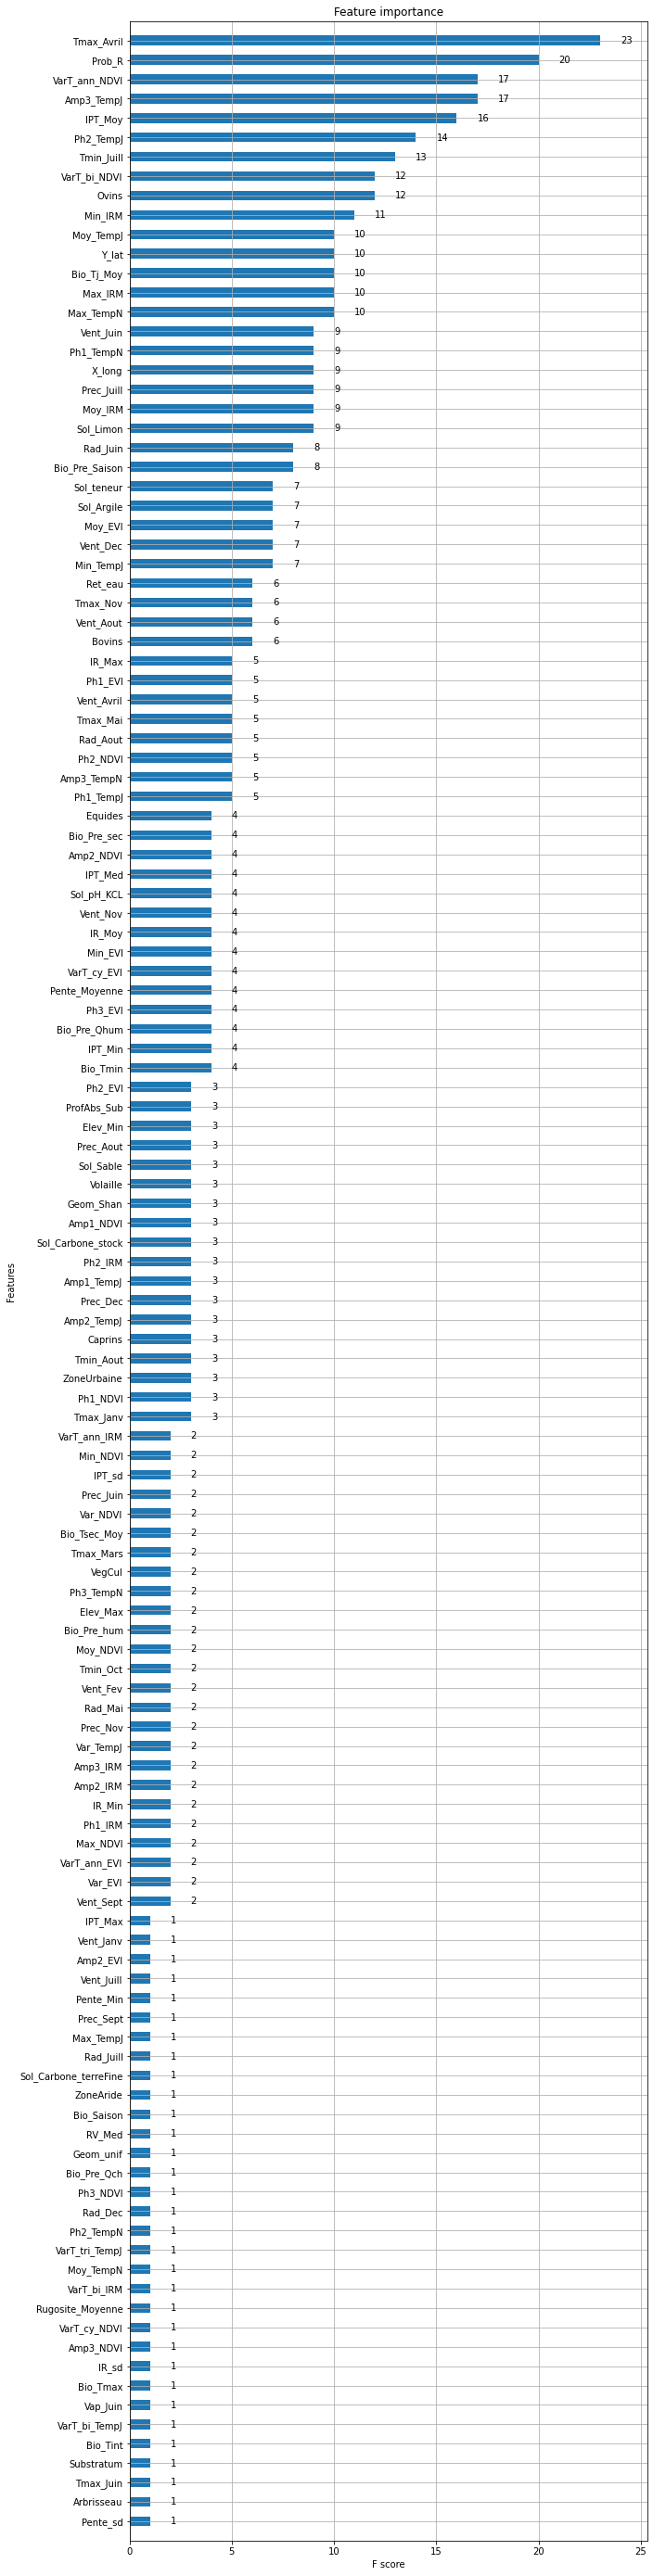

{'Vent_Sept': 2, 'Tmax_Janv': 3, 'Tmax_Avril': 23, 'Pente_sd': 1, 'Ph1_TempJ': 5, 'Bio_Tmin': 4, 'Var_EVI': 2, 'Bio_Pre_Saison': 8, 'Rad_Juin': 8, 'Prob_R': 20, 'Sol_Limon': 9, 'VarT_ann_EVI': 2, 'Amp3_TempJ': 17, 'Min_TempJ': 7, 'Vent_Dec': 7, 'Max_NDVI': 2, 'Max_TempN': 10, 'IPT_Moy': 16, 'Ph1_IRM': 2, 'Max_IRM': 10, 'Tmin_Juill': 13, 'Arbrisseau': 1, 'Moy_IRM': 9, 'Ph1_NDVI': 3, 'Bio_Tj_Moy': 10, 'Amp3_TempN': 5, 'Prec_Juill': 9, 'Tmax_Juin': 1, 'IR_Min': 2, 'IPT_Min': 4, 'Amp2_IRM': 2, 'Y_lat': 10, 'Ph2_TempJ': 14, 'Substratum': 1, 'Bio_Pre_Qhum': 4, 'Bio_Tint': 1, 'ZoneUrbaine': 3, 'Amp3_IRM': 2, 'Ovins': 12, 'Ph3_EVI': 4, 'Bovins': 6, 'Var_TempJ': 2, 'Ph2_NDVI': 5, 'Pente_Moyenne': 4, 'VarT_ann_NDVI': 17, 'VarT_bi_TempJ': 1, 'VarT_cy_EVI': 4, 'Min_IRM': 11, 'Vent_Aout': 6, 'Rad_Aout': 5, 'Prec_Nov': 2, 'Tmin_Aout': 3, 'Min_EVI': 4, 'Tmax_Mai': 5, 'Vap_Juin': 1, 'Bio_Tmax': 1, 'X_long': 9, 'Caprins': 3, 'IR_Moy': 4, 'IR_sd': 1, 'VarT_bi_NDVI': 12, 'Amp3_NDVI': 1, 'VarT_cy_NDVI': 1

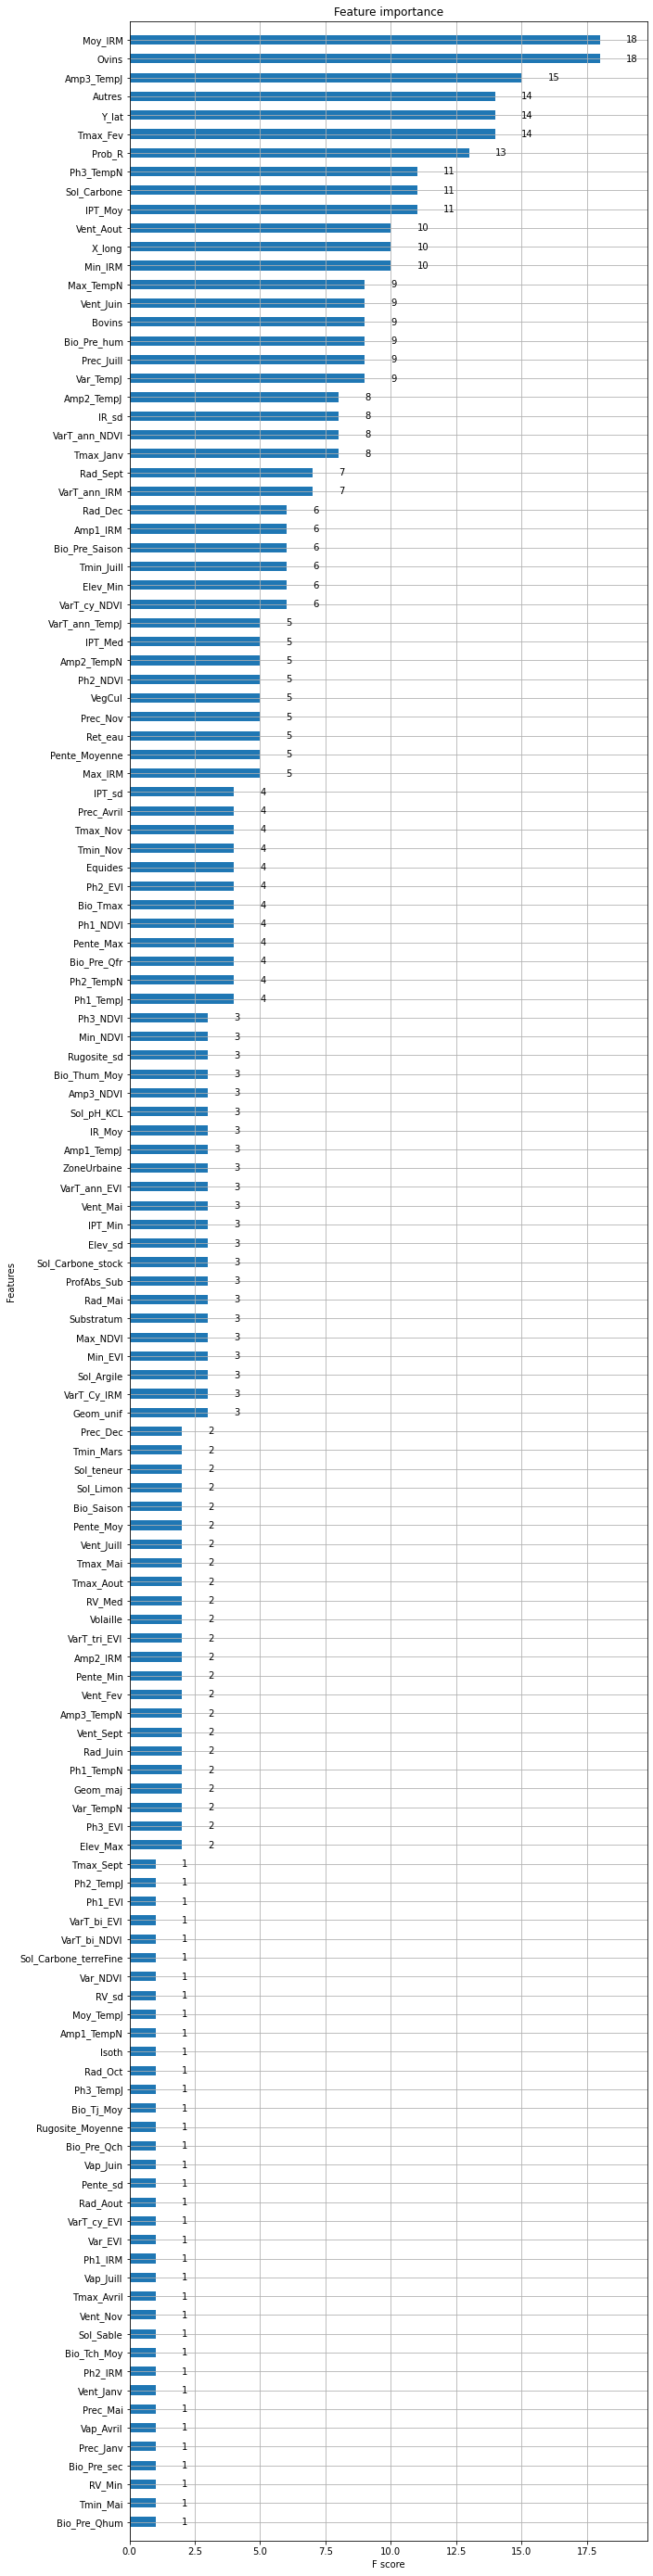

{'Amp3_TempJ': 15, 'Ovins': 18, 'Ph1_TempJ': 4, 'Var_TempJ': 9, 'Tmax_Fev': 14, 'Ph2_TempN': 4, 'Max_IRM': 5, 'Elev_Max': 2, 'Ph3_EVI': 2, 'Moy_IRM': 18, 'Pente_Moyenne': 5, 'Bio_Pre_Qfr': 4, 'Var_TempN': 2, 'Geom_maj': 2, 'Geom_unif': 3, 'IPT_Moy': 11, 'Ph1_TempN': 2, 'Pente_Max': 4, 'Y_lat': 14, 'Rad_Juin': 2, 'Tmax_Janv': 8, 'Ret_eau': 5, 'Min_IRM': 10, 'Bio_Pre_Qhum': 1, 'Ph1_NDVI': 4, 'Tmin_Mai': 1, 'Prob_R': 13, 'RV_Min': 1, 'VarT_Cy_IRM': 3, 'Vent_Sept': 2, 'Amp3_TempN': 2, 'VarT_cy_NDVI': 6, 'Elev_Min': 6, 'Vent_Fev': 2, 'Sol_Argile': 3, 'Prec_Juill': 9, 'Bio_Tmax': 4, 'Tmin_Juill': 6, 'Min_EVI': 3, 'Prec_Nov': 5, 'Sol_Carbone': 11, 'Max_NDVI': 3, 'VarT_ann_IRM': 7, 'Bio_Pre_hum': 9, 'Ph2_EVI': 4, 'Ph3_TempN': 11, 'Bovins': 9, 'VegCul': 5, 'Bio_Pre_sec': 1, 'Pente_Min': 2, 'Substratum': 3, 'X_long': 10, 'Prec_Janv': 1, 'Rad_Mai': 3, 'Vap_Avril': 1, 'VarT_ann_NDVI': 8, 'Prec_Mai': 1, 'Amp2_IRM': 2, 'Equides': 4, 'Tmin_Nov': 4, 'Vent_Aout': 10, 'Tmax_Nov': 4, 'Prec_Avril': 4, 'Pr

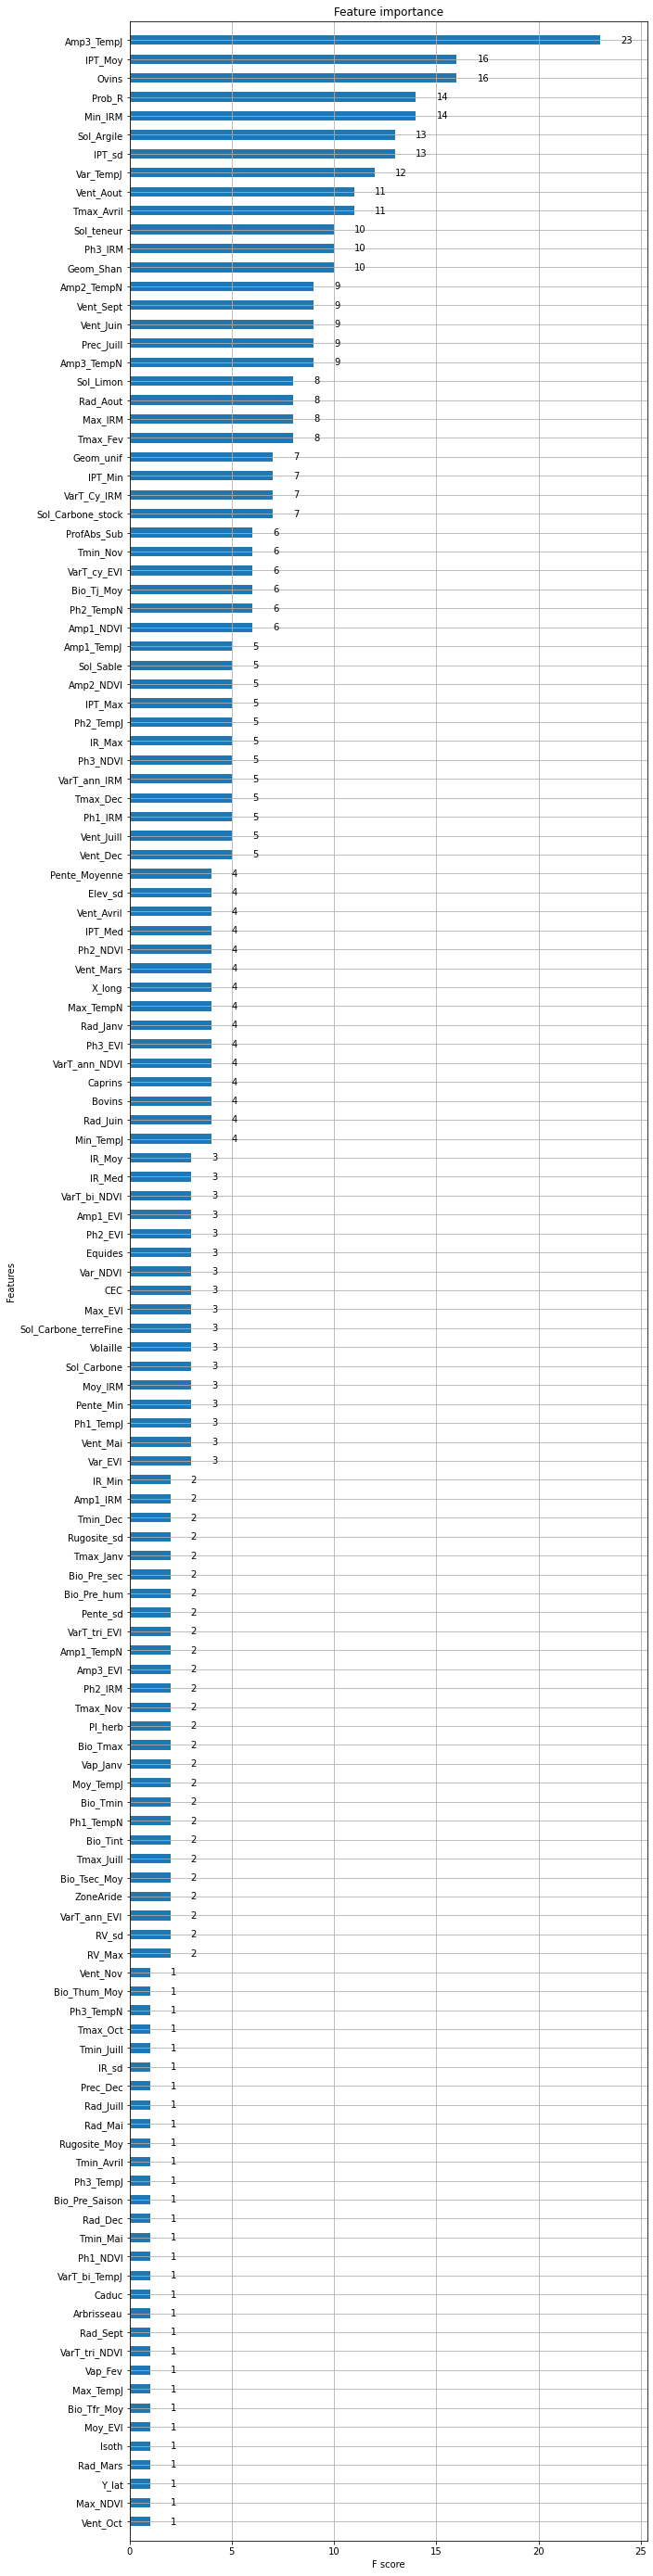

{'Amp3_TempJ': 23, 'Min_TempJ': 4, 'Amp1_NDVI': 6, 'Vent_Oct': 1, 'Var_EVI': 3, 'Amp3_TempN': 9, 'RV_Max': 2, 'Sol_Carbone_stock': 7, 'Rad_Juin': 4, 'Geom_Shan': 10, 'RV_sd': 2, 'Vent_Mai': 3, 'VarT_Cy_IRM': 7, 'Ph1_TempJ': 3, 'Vent_Dec': 5, 'Ph2_TempN': 6, 'Max_NDVI': 1, 'Vent_Juill': 5, 'Tmax_Fev': 8, 'Min_IRM': 14, 'Tmax_Avril': 11, 'Ovins': 16, 'Prec_Juill': 9, 'VarT_ann_EVI': 2, 'ZoneAride': 2, 'Bio_Tsec_Moy': 2, 'Tmax_Juill': 2, 'Ph1_IRM': 5, 'Bovins': 4, 'Y_lat': 1, 'Rad_Mars': 1, 'Max_IRM': 8, 'Caprins': 4, 'Prob_R': 14, 'IPT_sd': 13, 'Vent_Juin': 9, 'Tmax_Dec': 5, 'Vent_Sept': 9, 'Rad_Aout': 8, 'VarT_ann_IRM': 5, 'VarT_ann_NDVI': 4, 'Ph3_EVI': 4, 'Isoth': 1, 'Vent_Aout': 11, 'Bio_Tint': 2, 'Ph1_TempN': 2, 'Moy_EVI': 1, 'IPT_Moy': 16, 'Ph3_IRM': 10, 'Sol_Argile': 13, 'Pente_Min': 3, 'Amp2_TempN': 9, 'Rad_Janv': 4, 'Bio_Tmin': 2, 'Ph3_NDVI': 5, 'Moy_IRM': 3, 'Moy_TempJ': 2, 'Bio_Tj_Moy': 6, 'IR_Max': 5, 'Sol_teneur': 10, 'Bio_Tfr_Moy': 1, 'Vap_Janv': 2, 'Max_TempN': 4, 'Max_Temp

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1.5,learning_rate=0.1,max_depth=3,n_estimators=100)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC

my_scorer1 = make_scorer(tp1, greater_is_better=True)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    for i, (train, test) in enumerate(cv.split(X1, y1)):
         model=clf.fit(X1.loc[train,], y1.loc[train,])
         fig, ax = plt.subplots(figsize=(10,50))
         xgb.plot_importance(model, max_num_features=250, height=0.5, ax=ax,importance_type='weight')
         plt.show() 
         #######       
         #Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
         f = 'weight'
         print(model.get_booster().get_score(importance_type= f))   
         #######  
    #evaluate model
    scores = cross_val_score(clf, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, X1, y1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, X1, y1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, X1, y1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, X1, y1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))

In [ ]:
lst = ["X_long","Y_lat","Bovins","Volaille","Caprins","Ovins","Equides","Coniferes",'ZoneAride','ZonePel','Lesfeuillus','Caduc','Autres','Arbrisseau','Pl_herb','VegCul','VegInond','ZoneUrbaine','Moy_IRM','Amp1_IRM','Amp2_IRM','Amp3_IRM','VarT_ann_IRM','VarT_bi_IRM','VarT_tri_IRM','VarT_Cy_IRM','Min_IRM','Max_IRM','Ph1_IRM','Ph2_IRM','Ph3_IRM','Var_IRM','Moy_TempJ','Amp1_TempJ','Amp2_TempJ','Amp3_TempJ','VarT_ann_TempJ','VarT_bi_TempJ','VarT_cy_TempJ','Min_TempJ','Max_TempJ','Ph1_TempJ','Ph2_TempJ','Ph3_TempJ','Var_TempJ','Moy_TempN','Amp1_TempN','Amp2_TempN','Amp3_TempN','VarT_ann_TempN','VarT_bi_TempN','VarT_tri_TempN','VarT_cy_TempN','Min_TempN','Max_TempN','Ph1_TempN','Ph2_TempN','Ph3_TempN','Var_TempN','Moy_NDVI','Amp1_NDVI','Amp2_NDVI','Amp3_NDVI','VarT_ann_NDVI','VarT_bi_NDVI','VarT_tri_NDVI','VarT_cy_NDVI','Min_NDVI','Max_NDVI','Ph1_NDVI','Ph2_NDVI','Ph3_NDVI','Var_NDVI','Moy_EVI','Amp1_EVI','Amp2_EVI','Amp3_EVI','VarT_ann_EVI','VarT_bi_EVI','VarT_tri_EVI','VarT_cy_EVI','Min_EVI','Max_EVI','Ph1_EVI','Ph2_EVI','Ph3_EVI','Var_EVI','Ret_eau','Sol_teneur','Substratum','Prob_R','ProfAbs_Sub','CEC+Sol_Argile','Sol_Carbone','Sol_Carbone_stock','Sol_Carbone_terreFine','Sol_pH_KCL','Sol_Limon','Sol_Sable','Elev_Max','Elev_Moyenne','Elev_Min','Elev_Moy','Elev_sd','Geom_maj','Geom_Shan','Geom_unif','Rugosite_Max','Rugosite_Moyenne','Rugosite_Min','Rugosite_Moy','Rugosite_sd','Pente_Max','Pente_Moyenne','Pente_Min','Pente_Moy','Pente_sd','IPT_Max','IPT_Med','IPT_Min','IPT_Moy','IPT_sd','IR_Max','IR_Med','IR_Min','IR_Moy','IR_sd','RV_Max','RV_Med','RV_Min','RV_Moy','RV_sd','Bio_Ta_moy','Bio_Tj_Moy','Isoth','Bio_Saison','Bio_Tmax','Bio_Tmin','Bio_Tint','Bio_Thum_Moy','Bio_Tsec_Moy','Bio_Tch_Moy','Bio_Tfr_Moy','Bio_Pre_Ann','Bio_Pre_hum','Bio_Pre_sec','Bio_Pre_Saison','Bio_Pre_Qhum','Bio_Pre_Qsec','Bio_Pre_Qch','Bio_Pre_Qfr','Prec_Janv','Prec_Fev','Prec_Mars','Prec_Avril','Prec_Mai','Prec_Juin','Prec_Juill','Prec_Aout','Prec_Sept','Prec_Oct','Prec_Nov','Prec_Dec','Rad_Janv','Rad_Fev','Rad_Mars','Rad_Avril','Rad_Mai','Rad_Juin','Rad_Juill','Rad_Aout','Rad_Sept','Rad_Oct','Rad_Nov','Rad_Dec','Tmax_Janv','Tmax_Fev','Tmax_Mars','Tmax_Avril','Tmax_Mai','Tmax_Juin','Tmax_Juill','Tmax_Aout','Tmax_Sept','Tmax_Oct','Tmax_Nov','Tmax_Dec','Tmin_Janv','Tmin_Fev','Tmin_Mars','Tmin_Avril','Tmin_Mai','Tmin_Juin','Tmin_Juill','Tmin_Aout','Tmin_Sept','Tmin_Oct','Tmin_Nov','Tmin_Dec','Vap_Janv','Vap_Fev','Vap_Mars','Vap_Avril','Vap_Mai','Vap_Juin','Vap_Juill','Vap_Aout','Vap_Sept','Vap_Oct','Vap_Nov','Vap_Dec','Vent_Janv','Vent_Fev','Vent_Mars','Vent_Avril','Vent_Mai','Vent_Juin','Vent_Juill','Vent_Aout','Vent_Sept','Vent_Oct','Vent_Nov','Vent_Dec']

In [ ]:
lst1={'Amp3_TempJ': 14, 'Moy_TempJ': 12, 'Vent_Dec': 8, 'Tmax_Fev': 8, 'Ph2_NDVI': 7, 'Ovins': 16, 'Tmax_Janv': 4, 'Moy_IRM': 6, 'VarT_bi_TempJ': 5, 'Ph1_IRM': 5, 'Moy_EVI': 1, 'IPT_Moy': 9, 'Y_lat': 4, 'Max_TempJ': 10, 'Min_EVI': 3, 'Rad_Aout': 2, 'Ph2_TempJ': 14, 'Tmin_Fev': 9, 'Tmax_Avril': 7, 'IPT_Min': 4, 'Prob_R': 20, 'Max_IRM': 1, 'Vap_Fev': 1, 'VarT_bi_NDVI': 2, 'VarT_ann_NDVI': 7, 'Tmin_Juill': 5, 'Ph1_NDVI': 4, 'VarT_ann_TempJ': 2, 'Rugosite_sd': 2, 'Prec_Juill': 8, 'Bio_Tmax': 2, 'ProfAbs_Sub': 15, 'Bovins': 4, 'Ph2_EVI': 11, 'Ph2_TempN': 1, 'Amp1_IRM': 7, 'Ph3_EVI': 3, 'Moy_NDVI': 1, 'Bio_Tch_Moy': 3, 'Amp2_TempN': 16, 'Amp3_TempN': 5, 'VarT_cy_TempN': 2, 'Sol_pH_KCL': 4, 'Amp2_NDVI': 6, 'Bio_Ta_moy': 3, 'VegCul': 6, 'Vent_Aout': 4, 'VarT_tri_NDVI': 4, 'Sol_Sable': 16, 'Amp2_EVI': 1, 'Vent_Juin': 4, 'Amp2_TempJ': 4, 'Rad_Avril': 4, 'Bio_Thum_Moy': 2, 'IR_Moy': 12, 'Sol_Argile': 3, 'Min_TempN': 3, 'IR_Max': 1, 'Amp1_TempJ': 6, 'Tmin_Aout': 7, 'Tmax_Mai': 1, 'Sol_Carbone': 7, 'Sol_teneur': 3, 'IPT_Med': 4, 'VarT_bi_EVI': 3, 'Pente_Min': 1, 'Elev_sd': 9, 'CEC': 1, 'Amp1_TempN': 3, 'Tmin_Dec': 2, 'Sol_Carbone_terreFine': 6, 'Min_TempJ': 6, 'IPT_Max': 7, 'Max_NDVI': 1, 'Bio_Tint': 3, 'Pente_Moyenne': 5, 'X_long': 3, 'Pente_sd': 9, 'Tmin_Oct': 2, 'VarT_cy_NDVI': 1, 'Tmin_Nov': 1, 'Min_IRM': 7, 'Bio_Pre_Qhum': 1, 'Tmax_Juin': 1, 'Sol_Limon': 3, 'Amp1_EVI': 4, 'Vent_Mai': 3, 'Ph1_TempN': 1, 'Ph1_EVI': 2, 'VarT_bi_IRM': 1, 'VarT_cy_EVI': 1, 'Vap_Dec': 1, 'Amp1_NDVI': 2, 'Ret_eau': 3, 'Rad_Janv': 4, 'Equides': 2, 'Rad_Oct': 3, 'Vent_Fev': 2, 'Ph1_TempJ': 7, 'Bio_Tsec_Moy': 3, 'Amp2_IRM': 9, 'Amp3_EVI': 1, 'Tmax_Dec': 1, 'Isoth': 1, 'Rad_Dec': 1, 'Vent_Mars': 2, 'Elev_Min': 3, 'Sol_Carbone_stock': 1, 'Geom_unif': 2, 'IR_Med': 2, 'IR_sd': 3, 'Bio_Tj_Moy': 2, 'Ph3_NDVI': 1, 'Rad_Sept': 1, 'Vent_Juill': 1, 'Vent_Nov': 2, 'Bio_Tmin': 1, 'Amp3_NDVI': 1, 'Vent_Avril': 1, 'VarT_tri_EVI': 1, 'Var_EVI': 1, 'Vent_Oct': 1, 'ZoneUrbaine': 1, 'Ph3_IRM': 1, 'Volaille': 3, 'Max_TempN': 3, 'VarT_ann_IRM': 2, 'Bio_Pre_hum': 1, 'Geom_maj': 2, 'Elev_Max': 1, 'Rugosite_Max': 1, 'Rugosite_Moyenne': 1, 'Max_EVI': 1}


In [ ]:
import pandas as pd
P=pd.DataFrame(list(lst1.items()),
                   columns=['variable', 'importance 1'])

In [ ]:
for var in lst :
    if var in lst1:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P=P.append({"variable" : var , 'importance 1' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
0
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
important
Amp2_IRM
0
Amp3_IRM
important
VarT_ann_IRM
important
VarT_bi_IRM
0
VarT_tri_IRM
0
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
0
Ph2_IRM
important
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
important
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
0
Ph3_TempJ
0
Var_TempJ
0
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
important
VarT_cy_TempN
important
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
0
Ph3_TempN
0
Var_TempN
important
M

In [ ]:
P

,variable,importance 1
0,Amp3_TempJ,14
1,Moy_TempJ,12
2,Vent_Dec,8
3,Tmax_Fev,8
4,Ph2_NDVI,7
...,...,...
220,Vap_Sept,0
221,Vap_Oct,0
222,Vap_Nov,0
223,Vent_Janv,0


In [ ]:
P.to_excel(r'P1.xlsx', index = False)

In [ ]:
lst2={'Amp3_TempJ': 18, 'Ovins': 21, 'Ph1_TempJ': 4, 'Volaille': 4, 'Moy_IRM': 13, 'Tmax_Fev': 3, 'Sol_Argile': 19, 'Moy_EVI': 3, 'IPT_Moy': 19, 'Ph3_EVI': 10, 'Amp1_TempJ': 6, 'Vent_Oct': 4, 'Amp1_TempN': 5, 'Tmax_Avril': 18, 'Tmax_Mars': 1, 'Min_TempJ': 5, 'Rad_Oct': 1, 'VarT_ann_TempJ': 1, 'Var_TempJ': 3, 'RV_Min': 1, 'Tmax_Janv': 5, 'Prec_Juill': 7, 'Bio_Tj_Moy': 4, 'Equides': 2, 'Max_TempN': 7, 'Rad_Juin': 1, 'Ph2_NDVI': 11, 'Var_NDVI': 3, 'Max_NDVI': 3, 'Pente_sd': 7, 'ProfAbs_Sub': 9, 'Amp3_NDVI': 4, 'VarT_Cy_IRM': 5, 'Ph1_IRM': 5, 'Sol_Carbone_stock': 4, 'Vent_Aout': 4, 'Rad_Aout': 5, 'Prec_Nov': 1, 'Amp3_TempN': 2, 'Bio_Tmin': 7, 'Y_lat': 12, 'Rad_Mars': 2, 'Max_IRM': 9, 'IR_Moy': 8, 'Bio_Pre_Saison': 5, 'VarT_cy_EVI': 6, 'Tmin_Aout': 1, 'Moy_NDVI': 2, 'Ph1_TempN': 1, 'Sol_teneur': 11, 'Ph1_EVI': 4, 'IPT_Min': 9, 'Ph3_IRM': 6, 'Bio_Ta_moy': 7, 'Vent_Juill': 1, 'IR_Med': 2, 'Pente_Moyenne': 8, 'Pente_Moy': 3, 'Rad_Sept': 7, 'Pente_Min': 3, 'Rad_Mai': 8, 'Tmin_Oct': 5, 'Vent_Mars': 1, 'IR_sd': 10, 'IR_Max': 2, 'Vent_Juin': 4, 'Geom_unif': 10, 'Bio_Tmax': 1, 'Geom_Shan': 2, 'Ph3_TempN': 6, 'VarT_ann_NDVI': 7, 'Rad_Janv': 1, 'Rugosite_Moy': 1, 'Rad_Dec': 1, 'Max_TempJ': 6, 'IPT_sd': 1, 'Ph2_TempN': 3, 'Rad_Fev': 6, 'Vent_Avril': 2, 'Ph3_TempJ': 2, 'Geom_maj': 1, 'Ph2_TempJ': 4, 'Amp2_TempJ': 1, 'Amp2_TempN': 4, 'Sol_Limon': 2, 'Min_TempN': 7, 'VarT_cy_NDVI': 1, 'Sol_Carbone_terreFine': 6, 'Amp2_NDVI': 5, 'VegCul': 1, 'X_long': 4, 'Rugosite_sd': 2, 'VarT_bi_NDVI': 5, 'Bio_Pre_sec': 4, 'Prec_Fev': 2, 'CEC': 1, 'Bio_Pre_Qfr': 1, 'Min_IRM': 1, 'Ph3_NDVI': 4, 'Prec_Dec': 1, 'Moy_TempJ': 2, 'Vent_Sept': 2, 'Ph2_EVI': 2, 'Tmin_Fev': 1, 'Tmax_Dec': 3, 'ZoneUrbaine': 3, 'Prob_R': 6, 'Elev_sd': 1, 'Rugosite_Min': 1, 'Bio_Saison': 3, 'Amp1_EVI': 1, 'Amp3_IRM': 1, 'VarT_ann_IRM': 5, 'Sol_Sable': 2, 'Amp2_EVI': 1, 'Bio_Pre_Qch': 2, 'Tmax_Mai': 1, 'Bio_Tch_Moy': 1, 'Sol_Carbone': 1, 'Prec_Avril': 1, 'Tmin_Mars': 1, 'Rad_Juill': 1, 'Amp1_IRM': 1, 'Elev_Max': 1, 'Ph2_IRM': 1, 'Sol_pH_KCL': 1, 'Min_NDVI': 1, 'Tmin_Sept': 1, 'Tmin_Avril': 1, 'VarT_ann_EVI': 1, 'Elev_Min': 1, 'Bio_Tint': 1, 'RV_sd': 1, 'Arbrisseau': 1, 'Moy_TempN': 2, 'Vent_Mai': 1, 'IR_Min': 2, 'RV_Med': 1, 'Bio_Pre_Qhum': 1, 'Bio_Pre_hum': 1}

In [ ]:
P2=pd.DataFrame(list(lst2.items()),
                   columns=["variable", "importance 2"])

In [ ]:
P2

,variable,importance 2
0,Amp3_TempJ,18
1,Ovins,21
2,Ph1_TempJ,4
3,Volaille,4
4,Moy_IRM,13
...,...,...
135,Vent_Mai,1
136,IR_Min,2
137,RV_Med,1
138,Bio_Pre_Qhum,1


In [ ]:
for var in lst :
    if var in lst2:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P2=P2.append({"variable" : var , 'importance 2' : 0} , ignore_index=True)

important
X_long
important
Y_lat
0
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
important
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
0
Amp2_IRM
important
Amp3_IRM
important
VarT_ann_IRM
0
VarT_bi_IRM
0
VarT_tri_IRM
important
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
important
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
0
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
important
Ph3_TempJ
important
Var_TempJ
important
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
important
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN

In [ ]:
P2

,variable,importance 2
0,Amp3_TempJ,18
1,Ovins,21
2,Ph1_TempJ,4
3,Volaille,4
4,Moy_IRM,13
...,...,...
220,Vap_Dec,0
221,Vent_Janv,0
222,Vent_Fev,0
223,Vent_Nov,0


In [ ]:
P2.to_excel(r'P2.xlsx', index = False)

In [ ]:
lst3={'Vent_Sept': 2, 'Tmax_Janv': 3, 'Tmax_Avril': 23, 'Pente_sd': 1, 'Ph1_TempJ': 5, 'Bio_Tmin': 4, 'Var_EVI': 2, 'Bio_Pre_Saison': 8, 'Rad_Juin': 8, 'Prob_R': 20, 'Sol_Limon': 9, 'VarT_ann_EVI': 2, 'Amp3_TempJ': 17, 'Min_TempJ': 7, 'Vent_Dec': 7, 'Max_NDVI': 2, 'Max_TempN': 10, 'IPT_Moy': 16, 'Ph1_IRM': 2, 'Max_IRM': 10, 'Tmin_Juill': 13, 'Arbrisseau': 1, 'Moy_IRM': 9, 'Ph1_NDVI': 3, 'Bio_Tj_Moy': 10, 'Amp3_TempN': 5, 'Prec_Juill': 9, 'Tmax_Juin': 1, 'IR_Min': 2, 'IPT_Min': 4, 'Amp2_IRM': 2, 'Y_lat': 10, 'Ph2_TempJ': 14, 'Substratum': 1, 'Bio_Pre_Qhum': 4, 'Bio_Tint': 1, 'ZoneUrbaine': 3, 'Amp3_IRM': 2, 'Ovins': 12, 'Ph3_EVI': 4, 'Bovins': 6, 'Var_TempJ': 2, 'Ph2_NDVI': 5, 'Pente_Moyenne': 4, 'VarT_ann_NDVI': 17, 'VarT_bi_TempJ': 1, 'VarT_cy_EVI': 4, 'Min_IRM': 11, 'Vent_Aout': 6, 'Rad_Aout': 5, 'Prec_Nov': 2, 'Tmin_Aout': 3, 'Min_EVI': 4, 'Tmax_Mai': 5, 'Vap_Juin': 1, 'Bio_Tmax': 1, 'X_long': 9, 'Caprins': 3, 'IR_Moy': 4, 'IR_sd': 1, 'VarT_bi_NDVI': 12, 'Amp3_NDVI': 1, 'VarT_cy_NDVI': 1, 'Vent_Avril': 5, 'Moy_EVI': 7, 'Vent_Nov': 4, 'Sol_pH_KCL': 4, 'Moy_TempJ': 10, 'Sol_Argile': 7, 'Amp2_TempJ': 3, 'Ph1_EVI': 5, 'IPT_Med': 4, 'Rugosite_Moyenne': 1, 'Ph1_TempN': 9, 'Prec_Dec': 3, 'Tmax_Nov': 6, 'Rad_Mai': 2, 'VarT_bi_IRM': 1, 'Amp2_NDVI': 4, 'IR_Max': 5, 'Ret_eau': 6, 'Amp1_TempJ': 3, 'Vent_Fev': 2, 'Tmin_Oct': 2, 'Moy_NDVI': 2, 'Moy_TempN': 1, 'Bio_Pre_hum': 2, 'Ph2_IRM': 3, 'VarT_tri_TempJ': 1, 'Vent_Juin': 9, 'Sol_teneur': 7, 'Elev_Max': 2, 'Sol_Carbone_stock': 3, 'Amp1_NDVI': 3, 'Ph2_TempN': 1, 'Rad_Dec': 1, 'Bio_Pre_sec': 4, 'Geom_Shan': 3, 'Ph3_TempN': 2, 'VegCul': 2, 'Tmax_Mars': 2, 'Volaille': 3, 'Bio_Tsec_Moy': 2, 'Ph3_NDVI': 1, 'Bio_Pre_Qch': 1, 'Var_NDVI': 2, 'Geom_unif': 1, 'RV_Med': 1, 'Sol_Sable': 3, 'Equides': 4, 'Prec_Aout': 3, 'Prec_Juin': 2, 'Bio_Saison': 1, 'ZoneAride': 1, 'IPT_sd': 2, 'Elev_Min': 3, 'Min_NDVI': 2, 'Sol_Carbone_terreFine': 1, 'Rad_Juill': 1, 'Max_TempJ': 1, 'ProfAbs_Sub': 3, 'Prec_Sept': 1, 'Pente_Min': 1, 'Ph2_EVI': 3, 'Vent_Juill': 1, 'Amp2_EVI': 1, 'Vent_Janv': 1, 'VarT_ann_IRM': 2, 'IPT_Max': 1}


In [ ]:
P3=pd.DataFrame(list(lst3.items()),
                   columns=["variable", "importance 3"])

In [ ]:
for var in lst :
    if var in lst3:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P3=P3.append({"variable" : var , 'importance 3' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
important
Caprins
important
Ovins
important
Equides
0
Coniferes
important
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
0
Autres
important
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
0
Amp1_IRM
important
Amp2_IRM
important
Amp3_IRM
important
VarT_ann_IRM
important
VarT_bi_IRM
0
VarT_tri_IRM
0
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
0
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
0
VarT_ann_TempJ
important
VarT_bi_TempJ
0
VarT_cy_TempJ
important
Min_TempJ
important
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
0
Ph3_TempJ
important
Var_TempJ
important
Moy_TempN
0
Amp1_TempN
0
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
0
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN
0
Var_TempN
imp

In [ ]:
P3

,variable,importance 3
0,Vent_Sept,2
1,Tmax_Janv,3
2,Tmax_Avril,23
3,Pente_sd,1
4,Ph1_TempJ,5
...,...,...
220,Vap_Nov,0
221,Vap_Dec,0
222,Vent_Mars,0
223,Vent_Mai,0


In [ ]:
P3.to_excel(r'P3.xlsx', index = False)

In [ ]:
lst4={'Amp3_TempJ': 15, 'Ovins': 18, 'Ph1_TempJ': 4, 'Var_TempJ': 9, 'Tmax_Fev': 14, 'Ph2_TempN': 4, 'Max_IRM': 5, 'Elev_Max': 2, 'Ph3_EVI': 2, 'Moy_IRM': 18, 'Pente_Moyenne': 5, 'Bio_Pre_Qfr': 4, 'Var_TempN': 2, 'Geom_maj': 2, 'Geom_unif': 3, 'IPT_Moy': 11, 'Ph1_TempN': 2, 'Pente_Max': 4, 'Y_lat': 14, 'Rad_Juin': 2, 'Tmax_Janv': 8, 'Ret_eau': 5, 'Min_IRM': 10, 'Bio_Pre_Qhum': 1, 'Ph1_NDVI': 4, 'Tmin_Mai': 1, 'Prob_R': 13, 'RV_Min': 1, 'VarT_Cy_IRM': 3, 'Vent_Sept': 2, 'Amp3_TempN': 2, 'VarT_cy_NDVI': 6, 'Elev_Min': 6, 'Vent_Fev': 2, 'Sol_Argile': 3, 'Prec_Juill': 9, 'Bio_Tmax': 4, 'Tmin_Juill': 6, 'Min_EVI': 3, 'Prec_Nov': 5, 'Sol_Carbone': 11, 'Max_NDVI': 3, 'VarT_ann_IRM': 7, 'Bio_Pre_hum': 9, 'Ph2_EVI': 4, 'Ph3_TempN': 11, 'Bovins': 9, 'VegCul': 5, 'Bio_Pre_sec': 1, 'Pente_Min': 2, 'Substratum': 3, 'X_long': 10, 'Prec_Janv': 1, 'Rad_Mai': 3, 'Vap_Avril': 1, 'VarT_ann_NDVI': 8, 'Prec_Mai': 1, 'Amp2_IRM': 2, 'Equides': 4, 'Tmin_Nov': 4, 'Vent_Aout': 10, 'Tmax_Nov': 4, 'Prec_Avril': 4, 'ProfAbs_Sub': 3, 'Vent_Janv': 1, 'Ph2_NDVI': 5, 'Ph2_IRM': 1, 'Bio_Tch_Moy': 1, 'Vent_Juin': 9, 'Autres': 14, 'Sol_Carbone_stock': 3, 'Amp2_TempN': 5, 'Max_TempN': 9, 'Sol_Sable': 1, 'Bio_Pre_Saison': 6, 'Elev_sd': 3, 'Vent_Nov': 1, 'Tmax_Avril': 1, 'Vap_Juill': 1, 'IPT_Min': 3, 'Vent_Mai': 3, 'IPT_Med': 5, 'Amp1_IRM': 6, 'VarT_tri_EVI': 2, 'Volaille': 2, 'RV_Med': 2, 'Tmax_Aout': 2, 'Tmax_Mai': 2, 'VarT_ann_EVI': 3, 'Ph1_IRM': 1, 'Rad_Sept': 7, 'VarT_ann_TempJ': 5, 'Var_EVI': 1, 'Vent_Juill': 2, 'IR_sd': 8, 'IPT_sd': 4, 'Pente_Moy': 2, 'VarT_cy_EVI': 1, 'Rad_Aout': 1, 'ZoneUrbaine': 3, 'Amp1_TempJ': 3, 'Pente_sd': 1, 'Vap_Juin': 1, 'Amp2_TempJ': 8, 'IR_Moy': 3, 'Bio_Saison': 2, 'Rad_Dec': 6, 'Sol_pH_KCL': 3, 'Sol_Limon': 2, 'Amp3_NDVI': 3, 'Bio_Pre_Qch': 1, 'Sol_teneur': 2, 'Rugosite_Moyenne': 1, 'Bio_Tj_Moy': 1, 'Ph3_TempJ': 1, 'Bio_Thum_Moy': 3, 'Rugosite_sd': 3, 'Min_NDVI': 3, 'Rad_Oct': 1, 'Tmin_Mars': 2, 'Isoth': 1, 'Amp1_TempN': 1, 'Moy_TempJ': 1, 'Prec_Dec': 2, 'RV_sd': 1, 'Var_NDVI': 1, 'Ph3_NDVI': 3, 'Sol_Carbone_terreFine': 1, 'VarT_bi_NDVI': 1, 'VarT_bi_EVI': 1, 'Ph1_EVI': 1, 'Ph2_TempJ': 1, 'Tmax_Sept': 1}

In [ ]:
P4=pd.DataFrame(list(lst4.items()),
                   columns=["variable", "importance 4"])

In [ ]:
for var in lst :
    if var in lst4:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P4=P4.append({"variable" : var , 'importance 4' : 0} , ignore_index=True)

important
X_long
important
Y_lat
important
Bovins
important
Volaille
0
Caprins
important
Ovins
important
Equides
0
Coniferes
0
ZoneAride
0
ZonePel
0
Lesfeuillus
0
Caduc
important
Autres
0
Arbrisseau
0
Pl_herb
important
VegCul
0
VegInond
important
ZoneUrbaine
important
Moy_IRM
important
Amp1_IRM
important
Amp2_IRM
0
Amp3_IRM
important
VarT_ann_IRM
0
VarT_bi_IRM
0
VarT_tri_IRM
important
VarT_Cy_IRM
important
Min_IRM
important
Max_IRM
important
Ph1_IRM
important
Ph2_IRM
0
Ph3_IRM
0
Var_IRM
important
Moy_TempJ
important
Amp1_TempJ
important
Amp2_TempJ
important
Amp3_TempJ
important
VarT_ann_TempJ
0
VarT_bi_TempJ
0
VarT_cy_TempJ
0
Min_TempJ
0
Max_TempJ
important
Ph1_TempJ
important
Ph2_TempJ
important
Ph3_TempJ
important
Var_TempJ
0
Moy_TempN
important
Amp1_TempN
important
Amp2_TempN
important
Amp3_TempN
0
VarT_ann_TempN
0
VarT_bi_TempN
0
VarT_tri_TempN
0
VarT_cy_TempN
0
Min_TempN
important
Max_TempN
important
Ph1_TempN
important
Ph2_TempN
important
Ph3_TempN
important
Var_TempN
0
Moy_NDVI


In [ ]:
P4

,variable,importance 4
0,Amp3_TempJ,15
1,Ovins,18
2,Ph1_TempJ,4
3,Var_TempJ,9
4,Tmax_Fev,14
...,...,...
219,Vap_Dec,0
220,Vent_Mars,0
221,Vent_Avril,0
222,Vent_Oct,0


In [ ]:
P4.to_excel(r'P4.xlsx', index = False)

In [ ]:
lst5 ={'Amp3_TempJ': 23, 'Min_TempJ': 4, 'Amp1_NDVI': 6, 'Vent_Oct': 1, 'Var_EVI': 3, 'Amp3_TempN': 9, 'RV_Max': 2, 'Sol_Carbone_stock': 7, 'Rad_Juin': 4, 'Geom_Shan': 10, 'RV_sd': 2, 'Vent_Mai': 3, 'VarT_Cy_IRM': 7, 'Ph1_TempJ': 3, 'Vent_Dec': 5, 'Ph2_TempN': 6, 'Max_NDVI': 1, 'Vent_Juill': 5, 'Tmax_Fev': 8, 'Min_IRM': 14, 'Tmax_Avril': 11, 'Ovins': 16, 'Prec_Juill': 9, 'VarT_ann_EVI': 2, 'ZoneAride': 2, 'Bio_Tsec_Moy': 2, 'Tmax_Juill': 2, 'Ph1_IRM': 5, 'Bovins': 4, 'Y_lat': 1, 'Rad_Mars': 1, 'Max_IRM': 8, 'Caprins': 4, 'Prob_R': 14, 'IPT_sd': 13, 'Vent_Juin': 9, 'Tmax_Dec': 5, 'Vent_Sept': 9, 'Rad_Aout': 8, 'VarT_ann_IRM': 5, 'VarT_ann_NDVI': 4, 'Ph3_EVI': 4, 'Isoth': 1, 'Vent_Aout': 11, 'Bio_Tint': 2, 'Ph1_TempN': 2, 'Moy_EVI': 1, 'IPT_Moy': 16, 'Ph3_IRM': 10, 'Sol_Argile': 13, 'Pente_Min': 3, 'Amp2_TempN': 9, 'Rad_Janv': 4, 'Bio_Tmin': 2, 'Ph3_NDVI': 5, 'Moy_IRM': 3, 'Moy_TempJ': 2, 'Bio_Tj_Moy': 6, 'IR_Max': 5, 'Sol_teneur': 10, 'Bio_Tfr_Moy': 1, 'Vap_Janv': 2, 'Max_TempN': 4, 'Max_TempJ': 1, 'VarT_cy_EVI': 6, 'Vap_Fev': 1, 'VarT_tri_NDVI': 1, 'Ph2_TempJ': 5, 'Sol_Limon': 8, 'X_long': 4, 'Sol_Carbone': 3, 'Tmin_Nov': 6, 'Rad_Sept': 1, 'Volaille': 3, 'Sol_Carbone_terreFine': 3, 'Arbrisseau': 1, 'Var_TempJ': 12, 'IPT_Min': 7, 'Geom_unif': 7, 'Bio_Tmax': 2, 'Pl_herb': 2, 'Caduc': 1, 'IPT_Max': 5, 'Max_EVI': 3, 'CEC': 3, 'Var_NDVI': 3, 'Amp2_NDVI': 5, 'Sol_Sable': 5, 'Tmax_Nov': 2, 'VarT_bi_TempJ': 1, 'Ph2_IRM': 2, 'Amp1_TempJ': 5, 'Amp3_EVI': 2, 'Vent_Mars': 4, 'Amp1_TempN': 2, 'ProfAbs_Sub': 6, 'Equides': 3, 'Ph1_NDVI': 1, 'VarT_tri_EVI': 2, 'Pente_sd': 2, 'Bio_Pre_hum': 2, 'Ph2_NDVI': 4, 'Tmin_Mai': 1, 'IPT_Med': 4, 'Ph2_EVI': 3, 'Rad_Dec': 1, 'Bio_Pre_Saison': 1, 'Amp1_EVI': 3, 'Vent_Avril': 4, 'Elev_sd': 4, 'VarT_bi_NDVI': 3, 'Bio_Pre_sec': 2, 'IR_Med': 3, 'Ph3_TempJ': 1, 'Tmin_Avril': 1, 'Rugosite_Moy': 1, 'Tmax_Janv': 2, 'IR_Moy': 3, 'Pente_Moyenne': 4, 'Rad_Mai': 1, 'Rugosite_sd': 2, 'Rad_Juill': 1, 'Prec_Dec': 1, 'Tmin_Dec': 2, 'IR_sd': 1, 'Tmin_Juill': 1, 'Amp1_IRM': 2, 'Tmax_Oct': 1, 'IR_Min': 2, 'Ph3_TempN': 1, 'Bio_Thum_Moy': 1, 'Vent_Nov': 1}

In [ ]:
P5=pd.DataFrame(list(lst5.items()),
                   columns=["variable", "importance 5"])

In [ ]:
for var in lst :
    if var in lst5:
     print("important")
     print(var)
    else:
        print(0)
        print(var)
        P5=P5.append({"variable" : var , 'importance 5' : 0} , ignore_index=True)

In [ ]:
P5

,variable,importance 5
0,Amp3_TempJ,23
1,Min_TempJ,4
2,Amp1_NDVI,6
3,Vent_Oct,1
4,Var_EVI,3
...,...,...
220,Vap_Oct,0
221,Vap_Nov,0
222,Vap_Dec,0
223,Vent_Janv,0


In [ ]:
P5.to_excel(r'P5.xlsx', index = False)

In [ ]:
Cl2 = '/content/PP.xlsx'
data2= pd.read_excel(Cl2,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
data2

,variable,importance 1,importance 2,importance 3,importance 4,importance 5
0,Amp3_TempJ,14,18,17,15,23
1,Moy_TempJ,12,2,10,1,2
2,Vent_Dec,8,0,7,0,5
3,Tmax_Fev,8,3,0,14,8
4,Ph2_NDVI,7,11,5,5,4
...,...,...,...,...,...,...
220,Vap_Sept,0,0,0,0,0
221,Vap_Oct,0,0,0,0,0
222,Vap_Nov,0,0,0,0,0
223,Vent_Janv,0,0,1,1,0


In [ ]:
T=data2.mean(axis = 1)

In [ ]:
T

0      17.4
1       5.4
2       4.0
3       6.6
4       6.4
       ... 
220     0.0
221     0.0
222     0.0
223     0.4
224     3.0
Length: 225, dtype: float64

In [ ]:
for i in range(225):
    T[i]=int(T[i])


In [ ]:
T

0      17.0
1       5.0
2       4.0
3       6.0
4       6.0
       ... 
220     0.0
221     0.0
222     0.0
223     0.0
224     3.0
Length: 225, dtype: float64

In [ ]:
df = pd.concat([data2,T], axis=1)

In [ ]:
df

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,0
0,Amp3_TempJ,14,18,17,15,23,17.0
1,Moy_TempJ,12,2,10,1,2,5.0
2,Vent_Dec,8,0,7,0,5,4.0
3,Tmax_Fev,8,3,0,14,8,6.0
4,Ph2_NDVI,7,11,5,5,4,6.0
...,...,...,...,...,...,...,...
220,Vap_Sept,0,0,0,0,0,0.0
221,Vap_Oct,0,0,0,0,0,0.0
222,Vap_Nov,0,0,0,0,0,0.0
223,Vent_Janv,0,0,1,1,0,0.0


In [ ]:
df=df.rename(columns = {0: 'moy_impo'})

In [ ]:
df

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17.0
1,Moy_TempJ,12,2,10,1,2,5.0
2,Vent_Dec,8,0,7,0,5,4.0
3,Tmax_Fev,8,3,0,14,8,6.0
4,Ph2_NDVI,7,11,5,5,4,6.0
...,...,...,...,...,...,...,...
220,Vap_Sept,0,0,0,0,0,0.0
221,Vap_Oct,0,0,0,0,0,0.0
222,Vap_Nov,0,0,0,0,0,0.0
223,Vent_Janv,0,0,1,1,0,0.0


In [ ]:
df=df.sort_values(by = 'moy_impo',ascending = False)

In [ ]:
df

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17.0
5,Ovins,16,21,12,18,16,16.0
11,IPT_Moy,9,19,16,11,16,14.0
20,Prob_R,20,6,20,13,14,14.0
18,Tmax_Avril,7,18,23,1,11,12.0
...,...,...,...,...,...,...,...
161,CEC+Sol_Argile,0,0,0,0,0,0.0
160,Substratum,0,0,1,3,0,0.0
52,Rad_Avril,4,0,0,0,0,0.0
156,Var_TempN,0,0,0,2,0,0.0


In [ ]:
df.to_excel(r'data_f.xlsx', index = False)

In [ ]:
Cl3 = '/content/data_f.xlsx'
data3= pd.read_excel(Cl3,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
data3

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17
1,Ovins,16,21,12,18,16,16
2,IPT_Moy,9,19,16,11,16,14
3,Prob_R,20,6,20,13,14,14
4,Tmax_Avril,7,18,23,1,11,12
...,...,...,...,...,...,...,...
220,CEC+Sol_Argile,0,0,0,0,0,0
221,Substratum,0,0,1,3,0,0
222,Rad_Avril,4,0,0,0,0,0
223,Var_TempN,0,0,0,2,0,0


In [ ]:
data3["moy_impo"]=sorted(data3["moy_impo"],reverse=True)

In [ ]:
data3

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17
1,Ovins,16,21,12,18,16,16
2,IPT_Moy,9,19,16,11,16,14
3,Prob_R,20,6,20,13,14,14
4,Tmax_Avril,7,18,23,1,11,12
...,...,...,...,...,...,...,...
220,CEC+Sol_Argile,0,0,0,0,0,0
221,Substratum,0,0,1,3,0,0
222,Rad_Avril,4,0,0,0,0,0
223,Var_TempN,0,0,0,2,0,0


In [ ]:
data3[0:50]

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17
1,Ovins,16,21,12,18,16,16
2,IPT_Moy,9,19,16,11,16,14
3,Prob_R,20,6,20,13,14,14
4,Tmax_Avril,7,18,23,1,11,12
5,Sol_Argile,3,19,7,3,13,9
6,Moy_IRM,6,13,9,18,3,9
7,Min_IRM,7,1,11,10,14,8
8,Prec_Juill,8,7,9,9,9,8
9,Y_lat,4,12,10,14,1,8


In [ ]:
impo_50 =  data3[0:50]

In [ ]:
impo_50

,variable,importance 1,importance 2,importance 3,importance 4,importance 5,moy_impo
0,Amp3_TempJ,14,18,17,15,23,17
1,Ovins,16,21,12,18,16,16
2,IPT_Moy,9,19,16,11,16,14
3,Prob_R,20,6,20,13,14,14
4,Tmax_Avril,7,18,23,1,11,12
5,Sol_Argile,3,19,7,3,13,9
6,Moy_IRM,6,13,9,18,3,9
7,Min_IRM,7,1,11,10,14,8
8,Prec_Juill,8,7,9,9,9,8
9,Y_lat,4,12,10,14,1,8


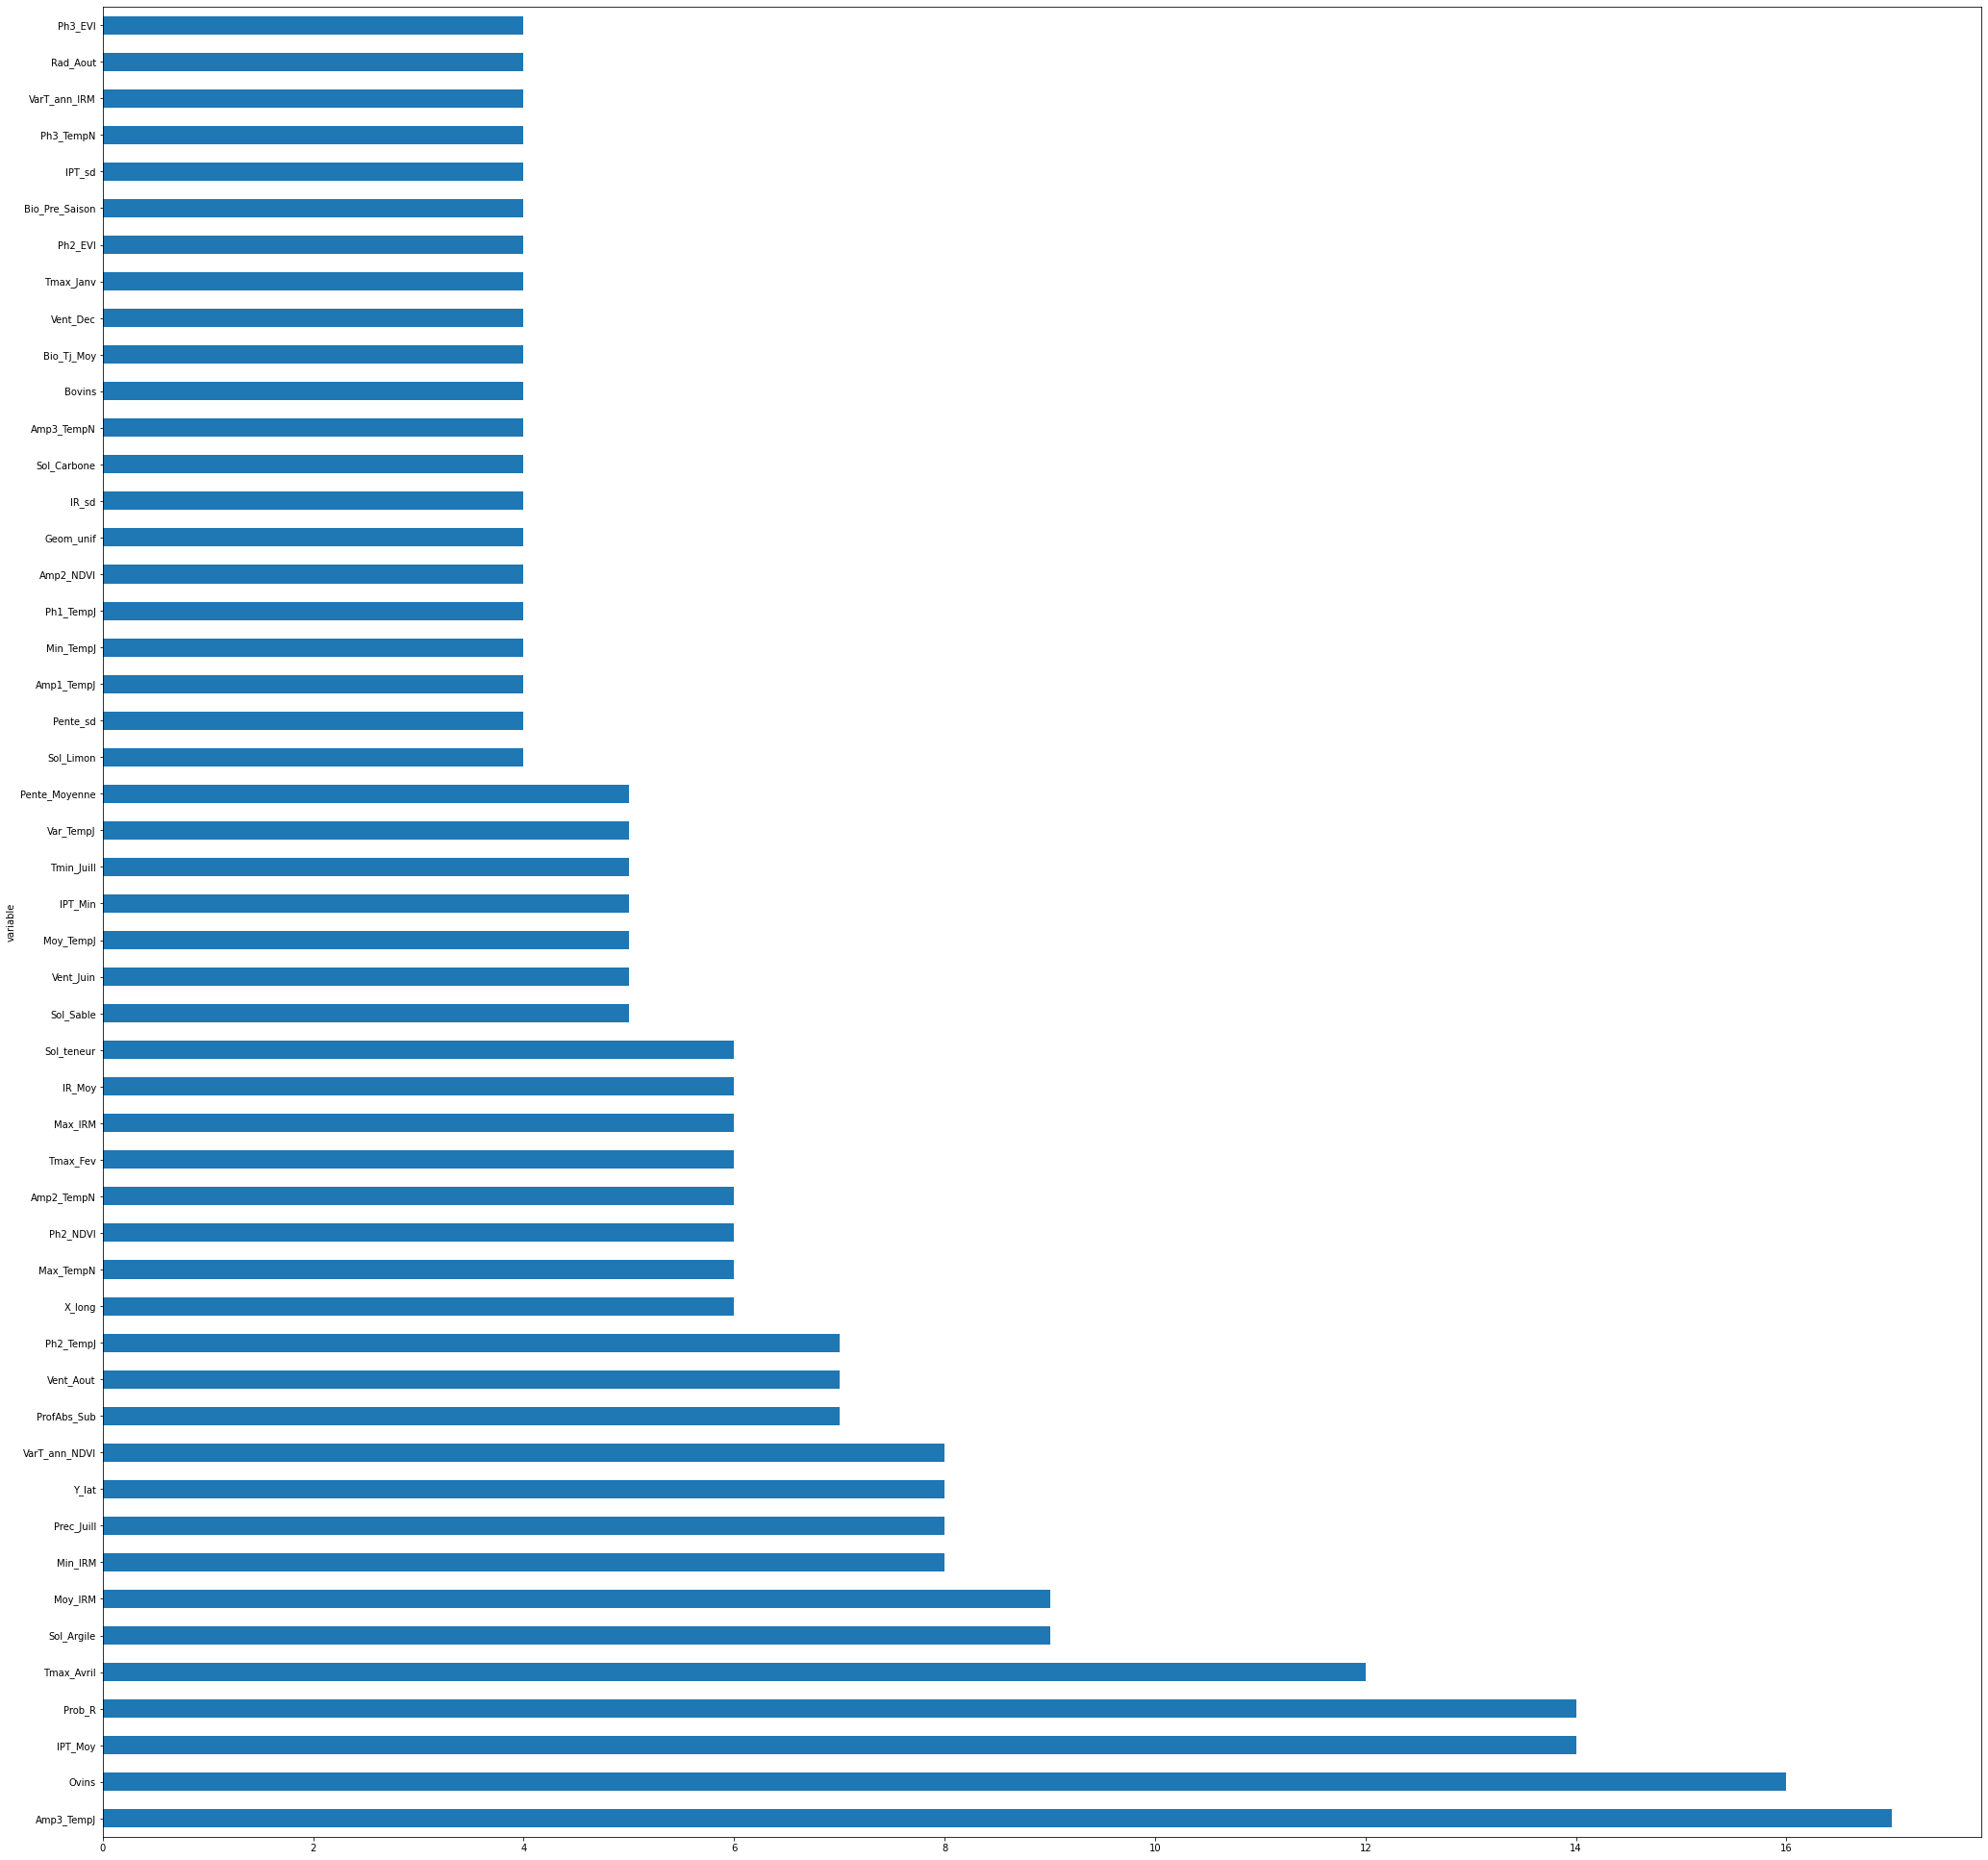

In [ ]:
	df2 = pd.DataFrame(impo_50, columns=['variable', 'moy_impo'])
	df2.plot(kind='barh', x='variable', y='moy_impo', legend=False, figsize=(35, 35),)
	plt.gcf().savefig('features_importance_50.png')
 

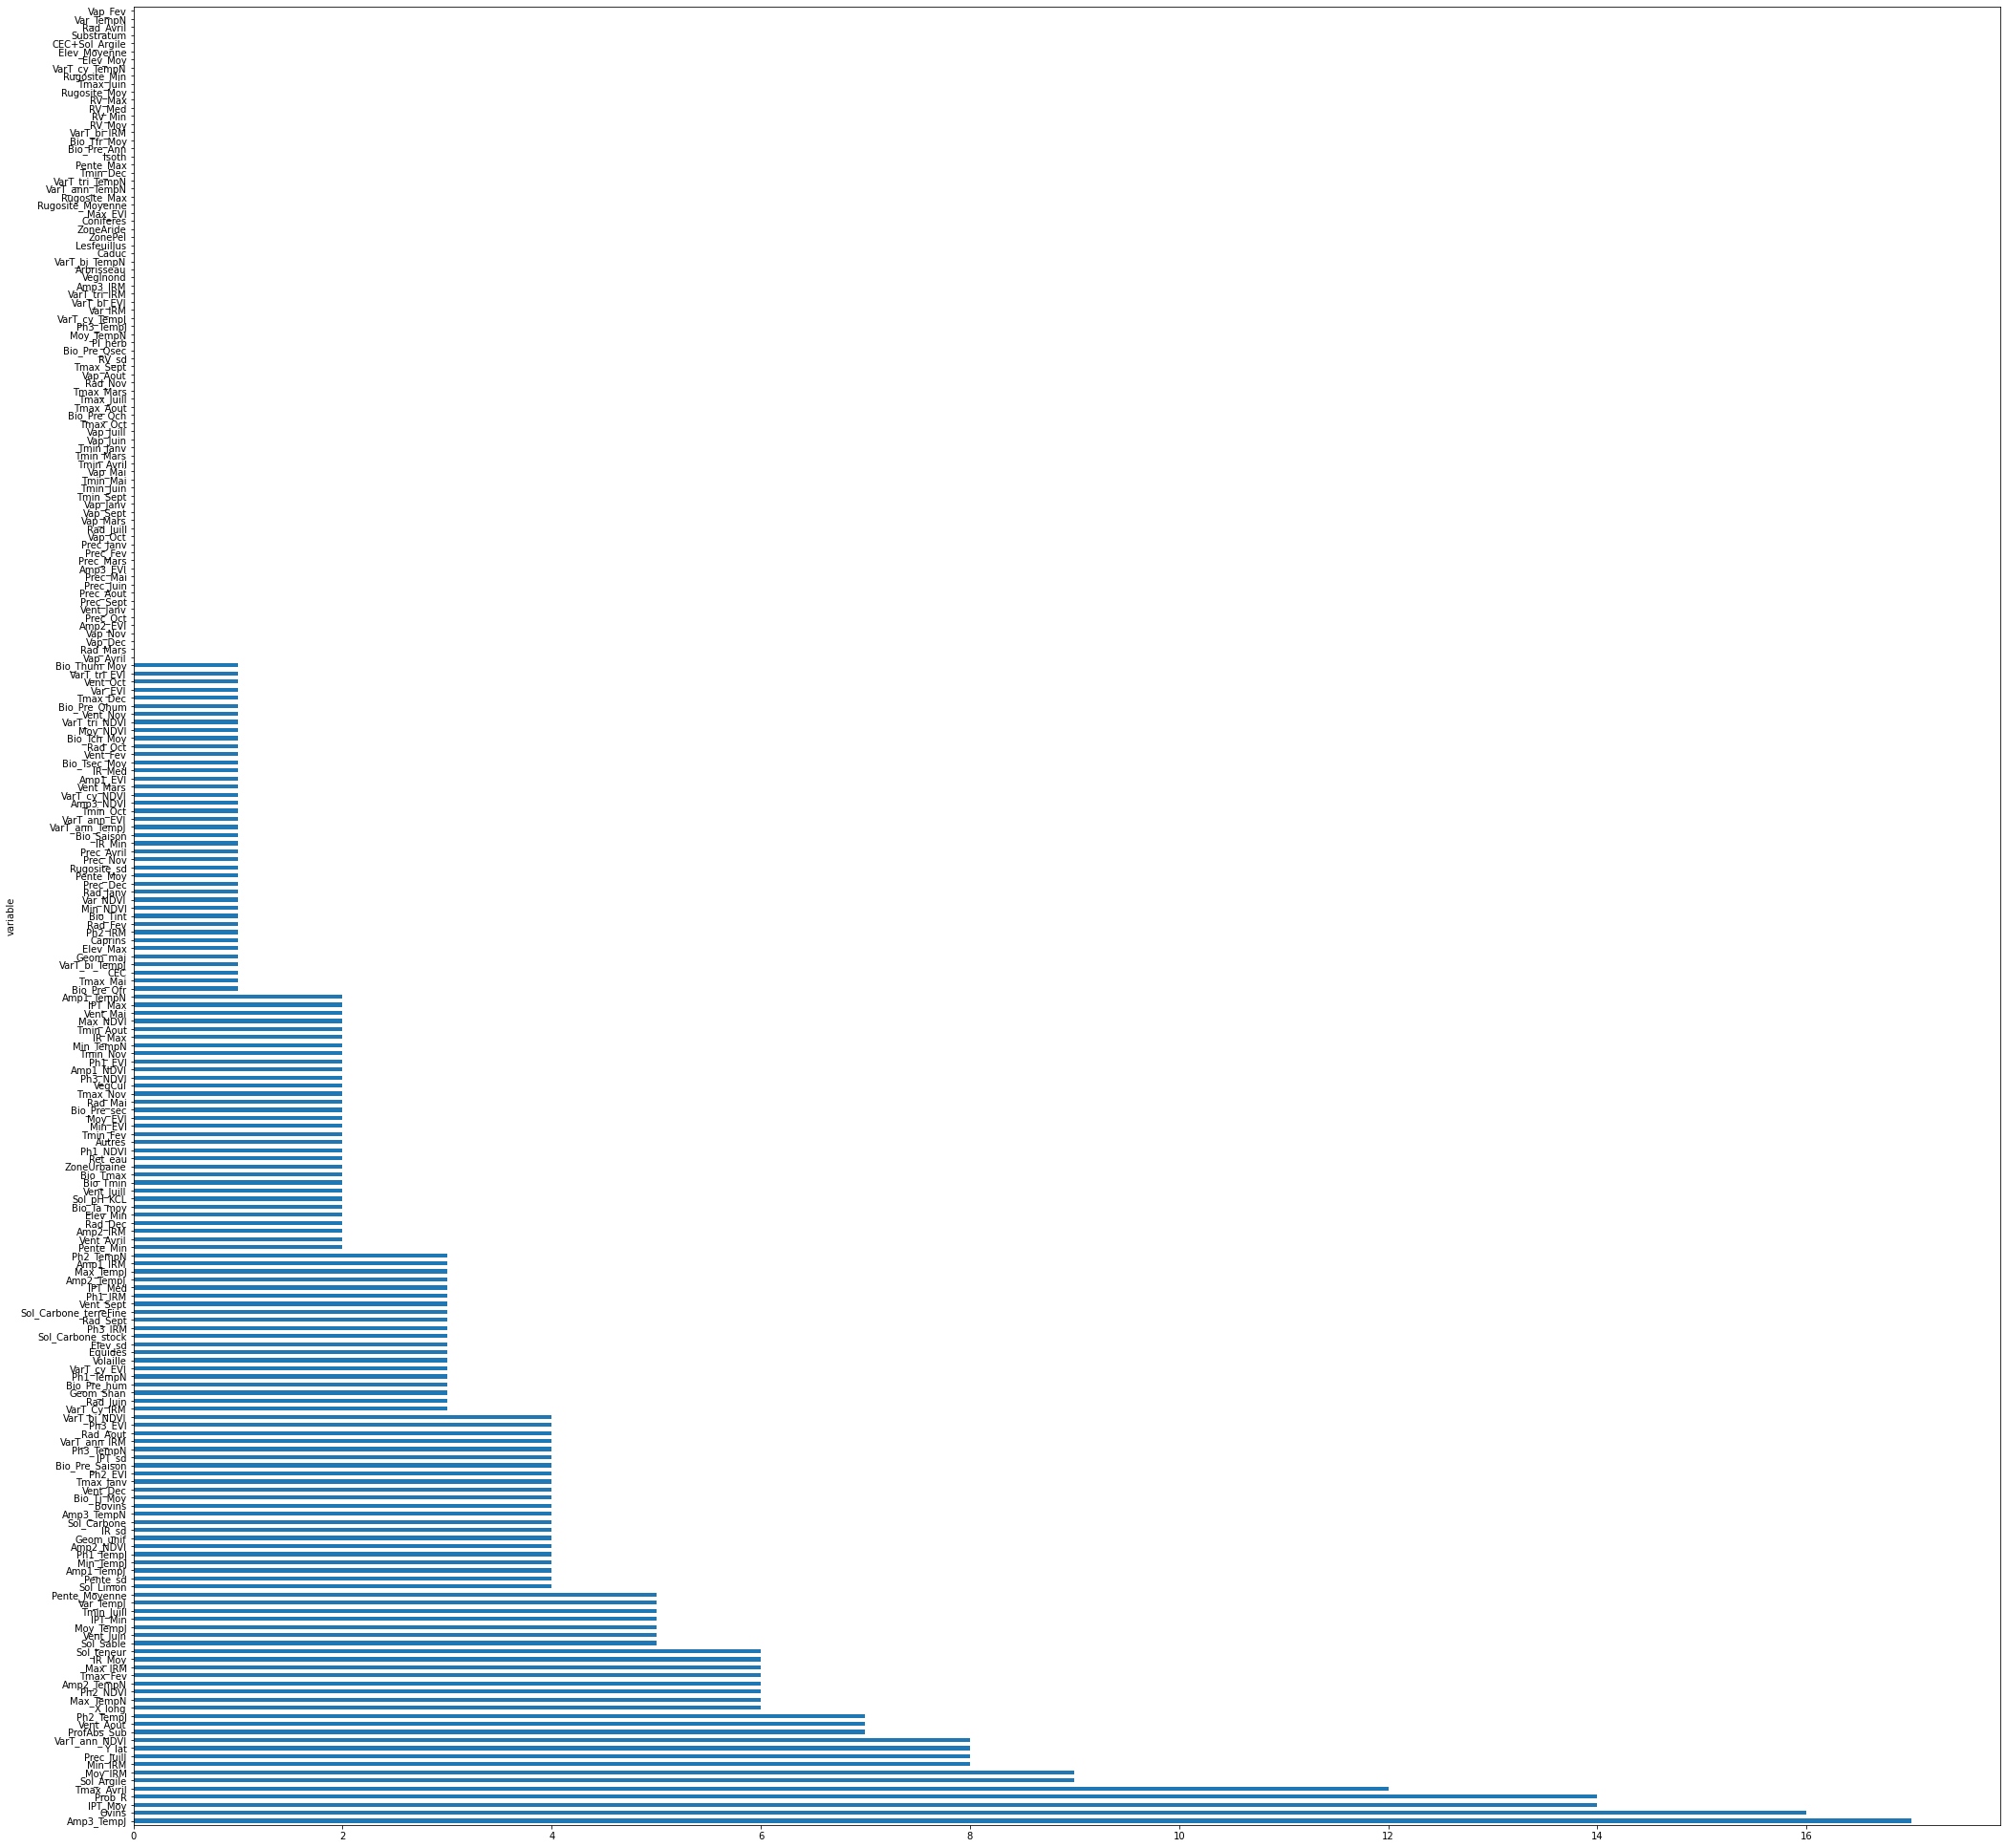

In [ ]:
	df1 = pd.DataFrame(data3, columns=['variable', 'moy_impo'])
	df1.plot(kind='barh', x='variable', y='moy_impo', legend=False, figsize=(35, 35),)
	plt.gcf().savefig('features_importance.png')
 
